<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_01_SkLearning_Modelos_de_Regress%C3%A3o_Passageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 01 - Modelos de Classificação - Regressão Linear.

In [69]:
# Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

In [36]:
# Criar um Objeto do tipo DataFrame - Chamado DF_Viagens
DF_Viagens = pd.read_csv('Passageiros.csv')

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# DF_Viagens=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/Passageiros.csv')

In [37]:
# Visualizando as 10 primeiras linhas do meu Data Frame
DF_Viagens.head(10)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [50]:
# Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

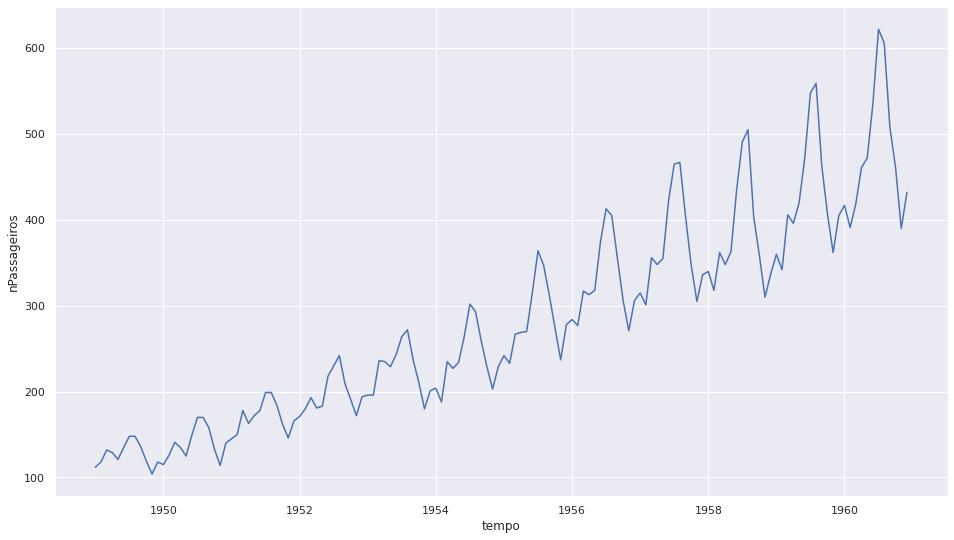

In [51]:
# Criar um gráfico linear de linhas utilizando o Matplotlib + Seaborn
plt.figure(figsize = (16,9))
sns.set(font_scale=1)
sns.lineplot(x="tempo", y="nPassageiros", data=DF_Viagens)

In [52]:
#Seleciona todas as colunas menos a última
Tempo = DF_Viagens.iloc[:,:-1].values

In [53]:
# Seleciona todas somente a coluna que tem o número de passageiros.
nPassageiros = DF_Viagens.iloc[:,1].values

In [54]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [59]:
tempo_treino, tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                         test_size = 0.3)

In [60]:
# Fazendo o Import do Algoritmo de Machine Learning - Regressão Linear Simples
from sklearn import linear_model

In [61]:
# Criando uma instancia do objeto para ser utilizado no modelo de regressão
regressor = linear_model.LinearRegression()

In [62]:
# Realizando o Treinamento do Modelo de Machine Learning.
# Ajustando a reta aos dados de treino
regressor.fit(tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Realizando os Testes com o modelo predito através do comando predict e dos dados de testes / Validação
nPassageiros_predito = regressor.predict(tempo_teste)

In [64]:
print(nPassageiros_predito)

[472.62791182 172.3276785   88.46004577 212.90879111 291.36560883
 277.83857129 313.00886888 318.4196839  250.78449621 440.16302173
 156.09523345 372.52783405 356.295389   437.45761423 418.51976167
 426.6359842  464.5116893  207.49797609 442.86842924 294.07101633
 101.9870833  137.1573809  415.81435417 456.39546678 237.25745868
 248.07908871 413.10894666 304.89264636 145.27360342 421.22516918
 461.80628179 434.75220672 410.40353915 261.60612624 323.83049891
 126.33575087 104.69249081  96.57626829 329.24131393 307.59805387
 388.76027909 191.26553105 193.97093856 361.70620402]


In [65]:
import numpy as np

In [67]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })

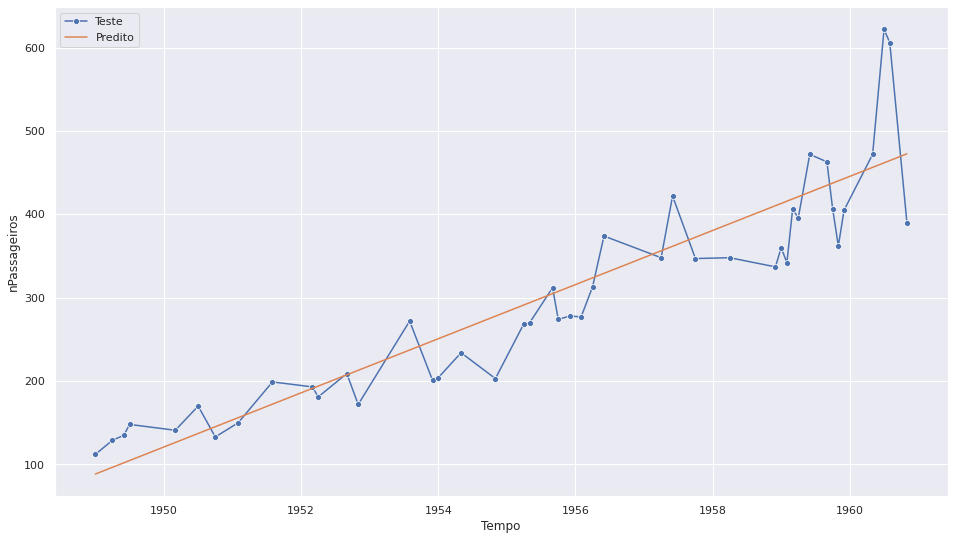

In [68]:
plt.figure(figsize = (16,9))
sns.set(font_scale=1)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )